# 导入库

In [325]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

# 定义参数

In [326]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

# 准备数据

In [327]:
print(os.listdir("./dataset/train"))

['tilt_03.jpg', 'fire_07.jpg', 'fire_03.jpg', 'ice_06.jpg', 'fire_17.jpg', 'fire_20.jpg', 'tilt_08.jpg', 'tilt_15.jpg', 'fire_16.jpg', 'fire_02.jpg', 'ice_19.jpg', 'tilt_01.jpg', 'fire_09.jpg', 'fire_12.jpg', 'ice_17.jpg', 'tilt_07.jpg', 'tilt_20.jpg', 'tilt_09.jpg', 'ice_07.jpg', 'ice_02.jpg', 'fire_13.jpg', 'fire_04.jpg', 'tilt_18.jpg', 'tilt_02.jpg', 'ice_10.jpg', 'tilt_04.jpg', 'fire_06.jpg', 'ice_16.jpg', 'tilt_13.jpg', 'fire_15.jpg', 'fire_10.jpg', 'ice_03.jpg', '.ipynb_checkpoints', 'tilt_05.jpg', 'fire_11.jpg', 'ice_12.jpg', 'ice_15.jpg', 'ice_08.jpg', 'fire_08.jpg', 'tilt_14.jpg', 'fire_19.jpg', 'ice_11.jpg', 'fire_05.jpg', 'tilt_16.jpg', 'ice_01.jpg', 'ice_09.jpg', 'ice_14.jpg', 'tilt_12.jpg', 'tilt_11.jpg', 'ice_04.jpg', 'tilt_06.jpg', 'fire_14.jpg', 'tilt_19.jpg', 'ice_13.jpg', 'fire_18.jpg', 'ice_20.jpg', 'ice_18.jpg', 'ice_05.jpg', 'tilt_10.jpg', 'fire_01.jpg', 'tilt_17.jpg']


In [328]:
filenames = os.listdir("./dataset/test")
categories = []
for filename in filenames:
    category = filename.split('_')[0]
    if category == 'fire':
        categories.append(1)
    elif category == 'ice':
        categories.append(0)
    else:
        categories.append(-1)

df_test = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

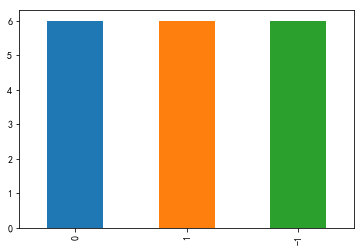

In [329]:
df_test['category'].value_counts().plot.bar()

In [330]:
filenames = os.listdir("./dataset/train")
categories = []
for filename in filenames:
    category = filename.split('_')[0]
    if category == 'fire':
        categories.append(1)
    elif category == 'ice':
        categories.append(0)
    else:
        categories.append(-1)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [331]:
df.head()

,category,filename
0,-1,tilt_03.jpg
1,1,fire_07.jpg
2,1,fire_03.jpg
3,0,ice_06.jpg
4,1,fire_17.jpg


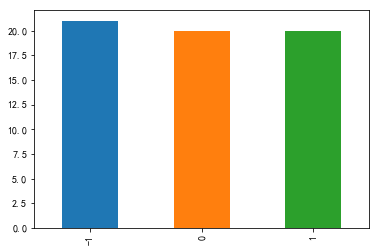

In [332]:
df['category'].value_counts().plot.bar()

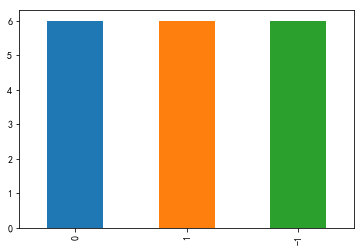

In [333]:
df_test['category'].value_counts().plot.bar()

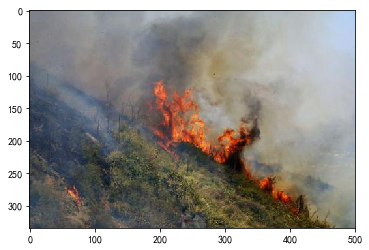

In [334]:
sample = random.choice(filenames)
image = load_img("./dataset/train/"+sample)
plt.imshow(image)

# 训练模型

In [335]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_21 (Batc (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_22 (Batc (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 64)       

In [336]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [337]:
earlystop = EarlyStopping(patience=10)

In [338]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [339]:
callbacks = [earlystop, learning_rate_reduction]

In [340]:
df_test

,category,filename
0,-1,tilt_26.jpg
1,1,fire_23.jpg
2,0,ice_23.jpg
3,1,fire_25.jpg
4,0,ice_26.jpg
5,0,ice_21.jpg
6,-1,tilt_25.jpg
7,1,fire_24.jpg
8,1,fire_26.jpg
9,0,ice_25.jpg


In [371]:
df["category"] = df["category"].replace({1: 'fire', 0: 'ice', -1: 'tilt'}) 

In [372]:
train_df, validate_df = train_test_split(df, test_size=0.25, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

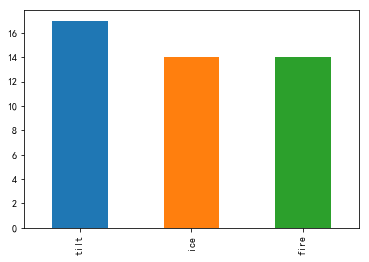

In [373]:
train_df['category'].value_counts().plot.bar()

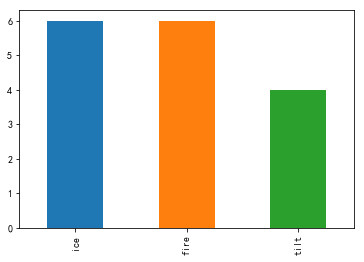

In [374]:
validate_df['category'].value_counts().plot.bar()

In [390]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=5

In [391]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [392]:
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "./dataset/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 44 validated image filenames belonging to 3 classes.


/home/ma-user/anaconda3/envs/TensorFlow-1.13.1/lib/python3.6/site-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [393]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./dataset/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 16 validated image filenames belonging to 3 classes.


In [394]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50
9/9 [==============================] - 6s 626ms/step - loss: 0.8306 - accuracy: 0.8409 - val_loss: 10.4806 - val_accuracy: 0.4000
Epoch 2/50


/home/ma-user/anaconda3/envs/TensorFlow-1.13.1/lib/python3.6/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


9/9 [==============================] - 5s 600ms/step - loss: 0.6764 - accuracy: 0.8409 - val_loss: 4.8433 - val_accuracy: 0.2727
Epoch 3/50
9/9 [==============================] - 5s 610ms/step - loss: 0.5549 - accuracy: 0.8409 - val_loss: 3.0495 - val_accuracy: 0.6364
Epoch 4/50
9/9 [==============================] - 5s 589ms/step - loss: 0.4874 - accuracy: 0.8182 - val_loss: 14.5022 - val_accuracy: 0.1818
Epoch 5/50
9/9 [==============================] - 5s 610ms/step - loss: 1.2348 - accuracy: 0.6818 - val_loss: 4.7085 - val_accuracy: 0.3333
Epoch 6/50
9/9 [==============================] - 5s 600ms/step - loss: 0.3014 - accuracy: 0.8864 - val_loss: 6.0543 - val_accuracy: 0.3636
Epoch 7/50
9/9 [==============================] - 5s 599ms/step - loss: 0.6148 - accuracy: 0.7500 - val_loss: 4.9929 - val_accuracy: 0.5455
Epoch 8/50
9/9 [==============================] - 5s 600ms/step - loss: 0.3205 - accuracy: 0.8409 - val_loss: 13.3228 - val_accuracy: 0.2727
Epoch 9/50
9/9 [=============

# 评估模型

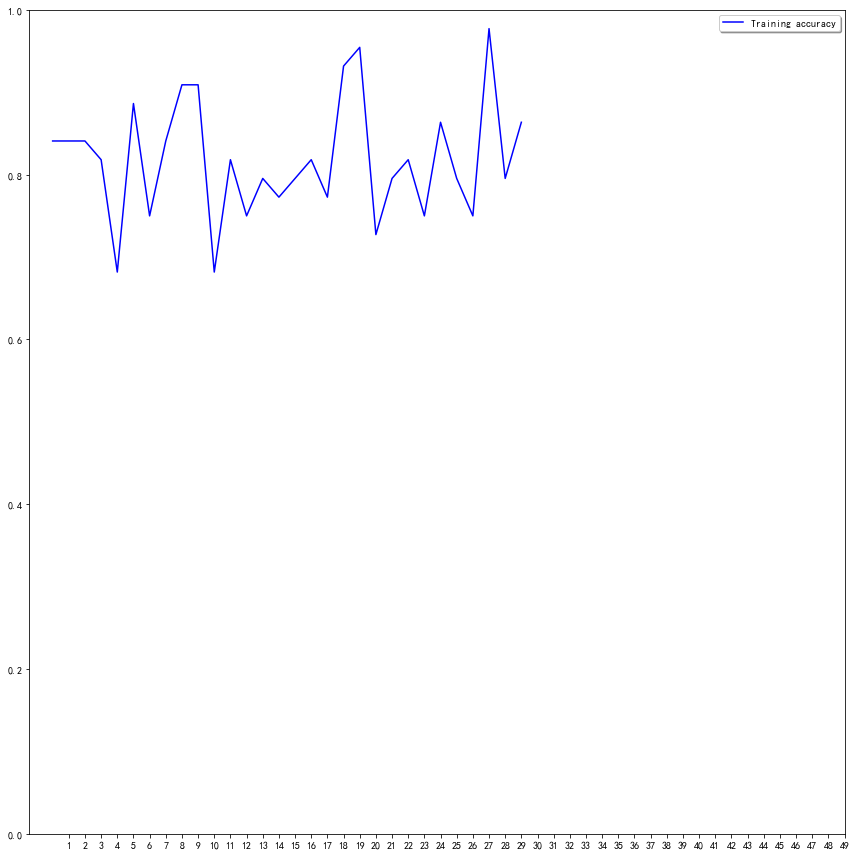

In [395]:
fig, ax = plt.subplots(1, figsize=(12, 12))

ax.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax.set_xticks(np.arange(1, epochs, 1))
ax.set_ylim(0,1)

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [401]:
test_filenames = os.listdir("./dataset/test/")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [402]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "./dataset/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 18 validated image filenames.


In [403]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [404]:
predict

array([[1.3910952e-03, 1.5504862e-02, 9.8310411e-01],
       [9.9554187e-01, 4.4137319e-03, 4.4413289e-05],
       [9.3463393e-07, 8.8024177e-03, 9.9119663e-01],
       [8.6530012e-01, 1.3441919e-01, 2.8066887e-04],
       [4.0565410e-05, 7.3204958e-01, 2.6790982e-01],
       [8.3825447e-02, 7.3716924e-02, 8.4245759e-01],
       [1.8476161e-05, 1.8320032e-04, 9.9979836e-01],
       [9.7587353e-01, 2.1926069e-03, 2.1933798e-02],
       [7.0572335e-01, 8.8681160e-03, 2.8540856e-01],
       [2.0526795e-06, 8.8488734e-01, 1.1511065e-01],
       [9.8855805e-01, 1.1436413e-02, 5.5972032e-06],
       [9.3478197e-01, 6.5195806e-02, 2.2283879e-05],
       [3.2777411e-05, 5.2050082e-03, 9.9476224e-01],
       [3.0798186e-04, 9.1758990e-01, 8.2102045e-02],
       [1.9835904e-02, 2.8580297e-02, 9.5158380e-01],
       [2.5992467e-05, 3.0071385e-05, 9.9994397e-01],
       [1.9218837e-04, 6.2462902e-03, 9.9356151e-01],
       [1.4811799e-06, 7.2829621e-03, 9.9271554e-01]], dtype=float32)

In [405]:
test_df['category'] = np.argmax(predict, axis=-1)

In [406]:
test_df

,filename,category
0,tilt_26.jpg,2
1,fire_23.jpg,0
2,ice_23.jpg,2
3,fire_25.jpg,0
4,ice_26.jpg,1
5,ice_21.jpg,2
6,tilt_25.jpg,2
7,fire_24.jpg,0
8,fire_26.jpg,0
9,ice_25.jpg,1
